In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [165]:
import pandas as pd
import numpy as py
import matplotlib.pylab as plt 
import seaborn as sns
plt.style.use('ggplot')





In [166]:
df = pd.read_csv('../input/supermarket/supermarket_sales.csv')

In [167]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [168]:
df['DateTime'] = df['Date'] + ' ' + df['Time']

In [169]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [170]:
df.set_index('DateTime', inplace=True)

In [171]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [172]:
df.shape

(1000, 17)

In [173]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [174]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
DateTime,,,,,,,,,,,,,,,,,
2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-29 13:46:00,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
2019-03-02 17:16:00,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
2019-02-09 13:22:00,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7


In [176]:
df= df[['Invoice ID', 'Branch', 'City', 'Customer type', #'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', #'Date','Time', 'DateTime',
        'Payment', 'cogs', 'gross margin percentage','gross income']]
       #'Rating']]

In [177]:
df.rename(columns={'Customer type':'Customer Type', 'Product line' : 'Product Line', 'Unit price' : 'Unit Price' , 'cogs' : 'COGS' , 'gross margin percentage' : 'Gross Margin Percentage', 'gross income':'Gross Income'}, inplace=True)

In [178]:
df

,Invoice ID,Branch,City,Customer Type,Product Line,Unit Price,Quantity,Tax 5%,Total,Payment,COGS,Gross Margin Percentage,Gross Income
DateTime,,,,,,,,,,,,,
2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415
2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200
2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155
2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880
2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-29 13:46:00,233-67-5758,C,Naypyitaw,Normal,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175
2019-03-02 17:16:00,303-96-2227,B,Mandalay,Normal,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900
2019-02-09 13:22:00,727-02-1313,A,Yangon,Member,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920


In [179]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer Type              0
Product Line               0
Unit Price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
COGS                       0
Gross Margin Percentage    0
Gross Income               0
dtype: int64

In [94]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [180]:
df.loc[df.duplicated(subset ='City')].head(10)

,Invoice ID,Branch,City,Customer Type,Product Line,Unit Price,Quantity,Tax 5%,Total,Payment,COGS,Gross Margin Percentage,Gross Income
DateTime,,,,,,,,,,,,,
2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155
2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880
2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085
2019-03-25 18:30:00,699-14-3026,C,Naypyitaw,Normal,Electronic accessories,85.39,7,29.8865,627.6165,Ewallet,597.73,4.761905,29.8865
2019-02-25 14:36:00,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.6520,433.6920,Ewallet,413.04,4.761905,20.6520
2019-02-24 11:38:00,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.7800,772.3800,Ewallet,735.60,4.761905,36.7800
2019-01-10 17:15:00,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.6260,76.1460,Credit card,72.52,4.761905,3.6260
2019-02-06 18:07:00,351-62-0822,B,Mandalay,Member,Fashion accessories,14.48,4,2.8960,60.8160,Ewallet,57.92,4.761905,2.8960
2019-03-09 17:03:00,529-56-3974,B,Mandalay,Member,Electronic accessories,25.51,4,5.1020,107.1420,Cash,102.04,4.761905,5.1020


In [181]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Text(0, 0.5, 'Counts')

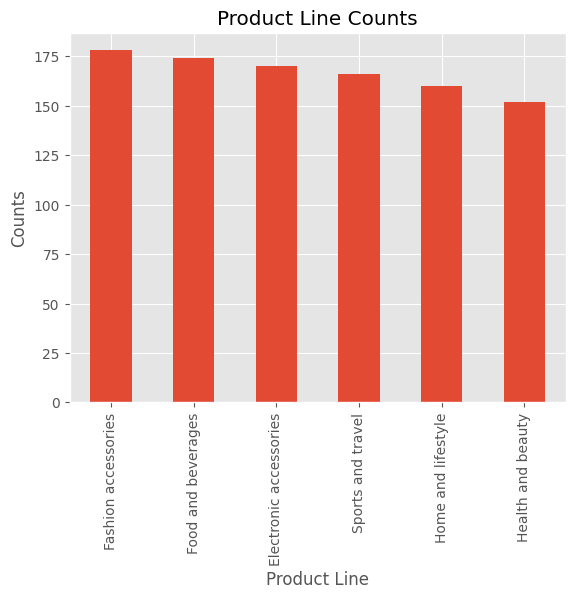

In [182]:
ax= df['Product Line'].value_counts().plot(kind='bar',title='Product Line Counts')
ax.set_xlabel('Product Line')
ax.set_ylabel('Counts')

In [183]:
df['Customer Type'].value_counts()

Customer Type
Member    501
Normal    499
Name: count, dtype: int64

Text(0, 0.5, '')

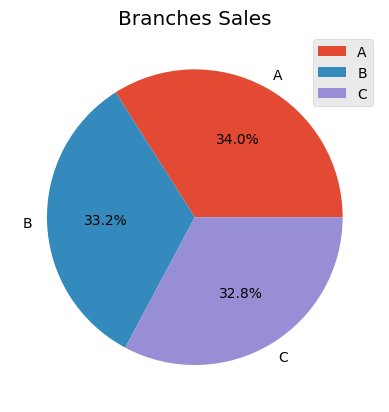

In [184]:
ax=df['Branch'].value_counts().plot(kind='pie' , title='Branches Sales',autopct='%1.1f%%', legend=True)
plt.ylabel('')

<Axes: title={'center': 'Total Price vs Gross Margin Percentage'}, xlabel='Total', ylabel='Gross Margin Percentage'>

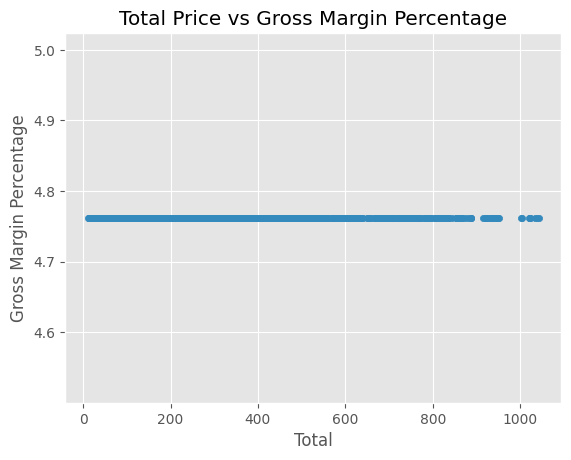

In [185]:
#	Understand profit behavior across prices
df.plot(kind='scatter', x='Total' , y='Gross Margin Percentage' , title='Total Price vs Gross Margin Percentage')

<Axes: title={'center': 'Unit Price Vs Quantity'}, xlabel='Quantity', ylabel='Unit Price'>

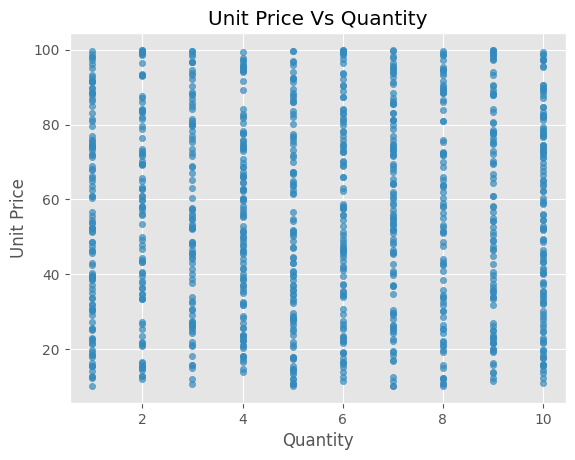

In [186]:
#	Check if lower prices drive more purchases
df.plot(kind='scatter', y='Unit Price' , x='Quantity',alpha=0.7, title='Unit Price Vs Quantity')

In [189]:
df_corr = df[['Total','Quantity',
    'Unit Price','COGS', 'Gross Income']].dropna().corr()
df_corr

,Total,Quantity,Unit Price,COGS,Gross Income
Total,1.000000,0.705510,0.633962,1.000000,1.000000
Quantity,0.705510,1.000000,0.010778,0.705510,0.705510
Unit Price,0.633962,0.010778,1.000000,0.633962,0.633962
COGS,1.000000,0.705510,0.633962,1.000000,1.000000
Gross Income,1.000000,0.705510,0.633962,1.000000,1.000000


<Axes: >

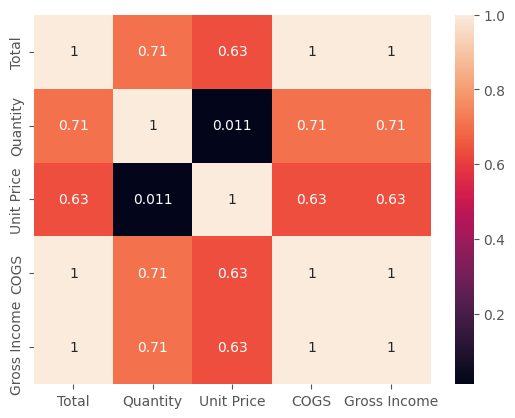

In [190]:
sns.heatmap(df_corr,annot=True)

<Axes: title={'center': 'COGS Vs Gross Income'}, xlabel='COGS', ylabel='Gross Income'>

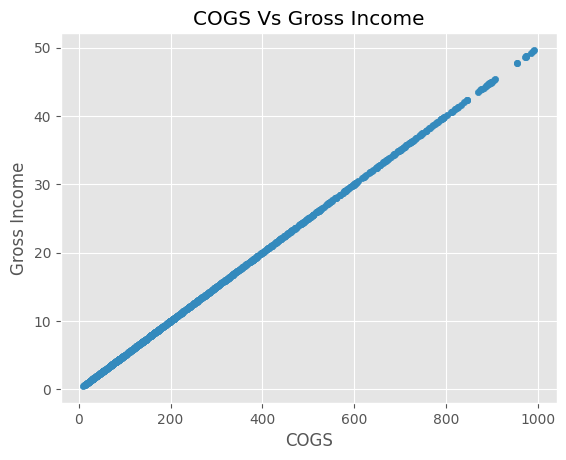

In [191]:
#how cogs affects the gross income(revenue)
df.plot(kind='scatter', y='Gross Income' , x='COGS', title='COGS Vs Gross Income')

<Axes: title={'center': 'Top 3 Product Lines by Total Sales'}, xlabel='Product Line'>

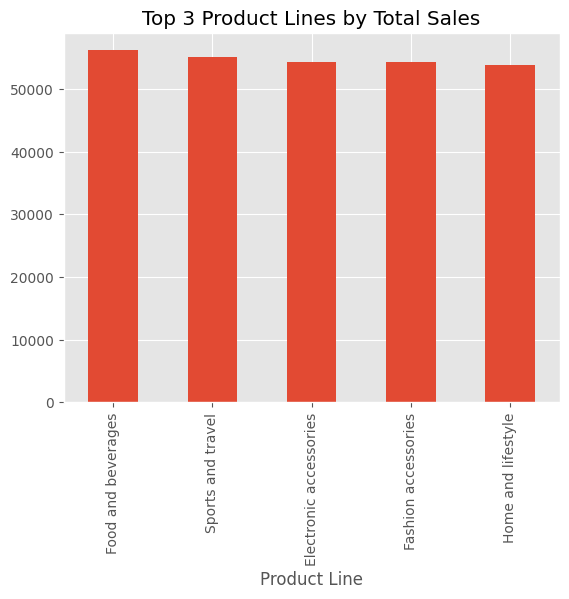

In [192]:
#top 5 product line in sales(total)
top_products = df.groupby('Product Line')['Total'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind='bar', x='Product Line', y='Total' ,title='Top 3 Product Lines by Total Sales' )

/tmp/ipykernel_31/3160788903.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  yearly_income = df['Gross Income'].resample('M').sum()


<Axes: title={'center': 'Profit over time'}, xlabel='DateTime'>

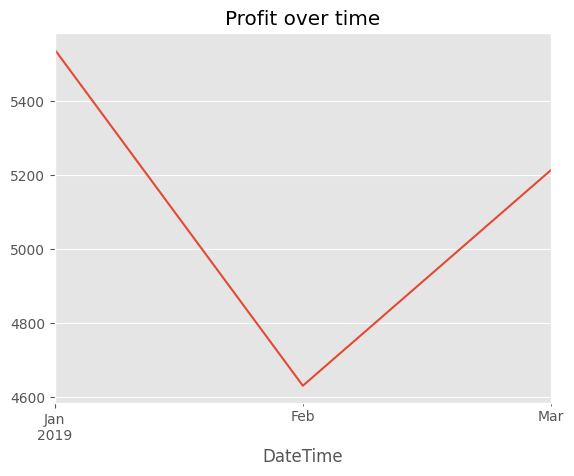

In [194]:
yearly_income = df['Gross Income'].resample('M').sum()
yearly_income.plot(kind='line',x='Year', y='Gross Income', title='Profit over time')

In [ ]:
#"Which customer type generates more revenue, 
#and how does their spending behavior vary by product line and payment method?"



In [197]:
top_products = df.groupby('Customer Type')['Gross Income'].sum().sort_values(ascending=False)
top_products

Customer Type
Member    7820.164
Normal    7559.205
Name: Gross Income, dtype: float64

In [205]:
product_behavior = df.groupby(['Customer Type','Product Line'])['Total'].sum().unstack()
product_behavior

Product Line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Customer Type,,,,,,
Member,24498.4950,26323.962,31357.620,25831.0395,27978.027,28234.3005
Normal,29839.0365,27981.933,24787.224,23362.6995,25883.886,26888.5260


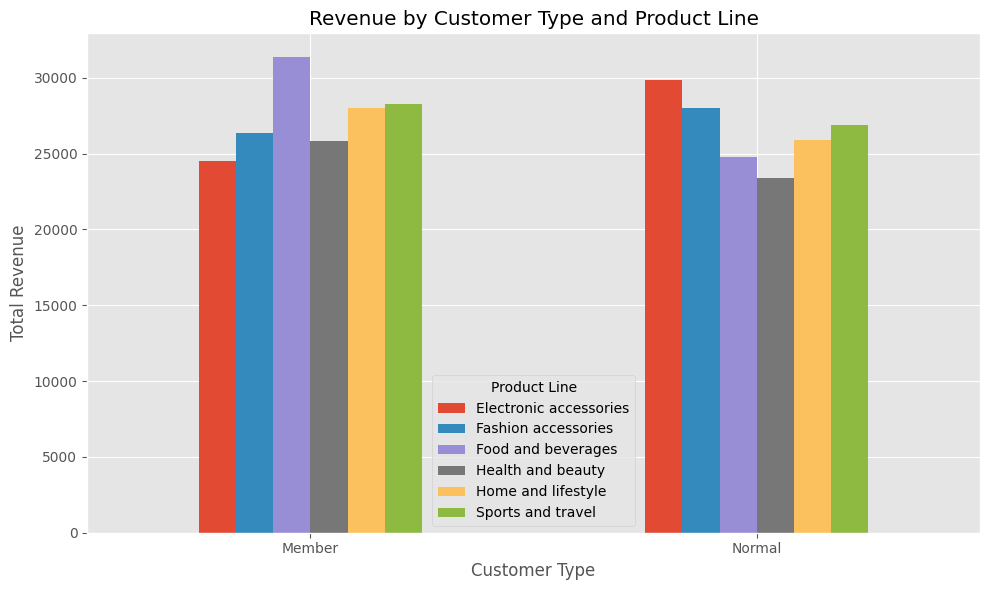

In [206]:
product_behavior.plot(kind='bar', figsize=(10, 6))
plt.title('Revenue by Customer Type and Product Line')
plt.ylabel('Total Revenue')
plt.xlabel('Customer Type')
plt.xticks(rotation=0)
plt.legend(title='Product Line')
plt.tight_layout()
plt.show()


In [207]:
payment_behavior = df.groupby(['Customer Type','Payment'])['Total'].sum().unstack()
payment_behavior

Payment,Cash,Credit card,Ewallet
Customer Type,,,
Member,54661.0155,57771.4725,51790.956
Normal,57545.5545,42995.5995,58202.151


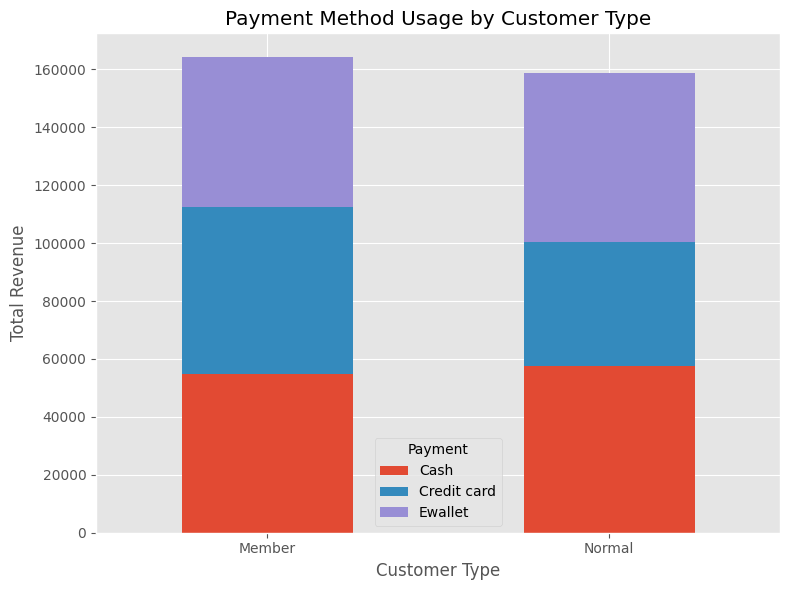

In [208]:
payment_behavior.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Payment Method Usage by Customer Type')
plt.ylabel('Total Revenue')
plt.xlabel('Customer Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
